This colab will use pretrained model ResNet50 in keras to train our model. 
1.   Connect To Google Drive Where Data Is Located
2.   Set up proper environment and packages including mobilenet model
1.   Train the model

1.   Check the accuracy











In [0]:
from google.colab import drive
drive.mount('/content/drive/') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install -p keras


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -p


In [0]:
import keras
import tensorflow as tf

Using TensorFlow backend.


In [0]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import pandas as pd
import boto3
from glob import glob
import matplotlib.pyplot as plt

Before one load data from google drive, one has to resize it locally. Here is a python code to help you size your images in one second. https://gist.github.com/durgaswaroop/6aea3b5aae21090fc17bfde8f4532477

In [0]:
IMAGE_SIZE = [128,128]

train_path = '/content/drive/My Drive/Colab Notebooks/New Rubbish Dataset/Resized Train'
test_path = '/content/drive/My Drive/Colab Notebooks/New Rubbish Dataset/Resized Test'
# raw image path = '/content/drive/My Drive/Colab Notebooks/New Rubbish Dataset/Train'
# raw_test_path = '/content/drive/My Drive/Colab Notebooks/New Rubbish Dataset/Test'

Once one set up train_path and test_path correctly, one can read images from dataset by using ImageDataGenerator

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.1, zoom_range = 0.1, horizontal_flip = True)
test_data = ImageDataGenerator(rescale = 1./255)

training_set = train_data.flow_from_directory(train_path, target_size = (128, 128), batch_size = 32, class_mode = 'categorical')

test_set = test_data.flow_from_directory(test_path, target_size = (128, 128), batch_size = 32, class_mode = 'categorical')

Found 599 images belonging to 3 classes.
Found 28 images belonging to 3 classes.


Lets import our pretrained model from keras and tweak on it.

In [0]:
#pretrained_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
#pretrained_model = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
#pretrained_model = tf.keras.applications.MobileNetV2(input_shape=[*IMAGE_SIZE, 3], include_top=False)
#pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False ,input_shape=[*IMAGE_SIZE, 3])
pretrained_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
#pretrained_model = tf.keras.application_inception_resnet_v2(include_top = TRUE,weights = "imagenet", input_tensor = NULL, input_shape = NULL,pooling = NULL, classes = 3)
#pretrained_model = tf.keras.application.densenet(blocks, include_top = TRUE, weights = "imagenet",input_tensor = NULL, input_shape = NULL, pooling = NULL,classes = 3)

pretrained_model.trainable = False

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Model)   (None, 4, 4, 1024)        3228864   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 32)          294944    
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 99        
Total params: 3,523,907
Trainable params: 295,043
Non-trainable params: 3,228,864
_________________________________________________________________


Let's train our model.

In [0]:
EPOCHS = 30
steps_per_epoch = 6  ; validation_steps = 32

history = model.fit(training_set, steps_per_epoch=steps_per_epoch, epochs=EPOCHS,
                    validation_data=test_set, validation_steps=validation_steps)

Epoch 1/30
6/6 [==============================] - 4s 596ms/step - loss: 1.7528 - accuracy: 0.4583 - val_loss: 0.6803 - val_accuracy: 0.6786
Epoch 2/30
6/6 [==============================] - 3s 510ms/step - loss: 1.0854 - accuracy: 0.5464 - val_loss: 0.6845 - val_accuracy: 0.6786
Epoch 3/30
6/6 [==============================] - 3s 505ms/step - loss: 0.8123 - accuracy: 0.5574 - val_loss: 0.6448 - val_accuracy: 0.6071
Epoch 4/30
6/6 [==============================] - 3s 504ms/step - loss: 0.7909 - accuracy: 0.5902 - val_loss: 0.6941 - val_accuracy: 0.5357
Epoch 5/30
6/6 [==============================] - 3s 528ms/step - loss: 0.7338 - accuracy: 0.6094 - val_loss: 0.5815 - val_accuracy: 0.6071
Epoch 6/30
6/6 [==============================] - 3s 505ms/step - loss: 0.6314 - accuracy: 0.7650 - val_loss: 0.6490 - val_accuracy: 0.5714
Epoch 7/30
6/6 [==============================] - 3s 529ms/step - loss: 0.7051 - accuracy: 0.7240 - val_loss: 0.7052 - val_accuracy: 0.6786
Epoch 8/30
6/6 [====

Lets display the accuracy curve with respect to epoch

In [0]:
import matplotlib.pyplot as plt

1/1 - 0s - loss: 1.4468 - accuracy: 0.6429


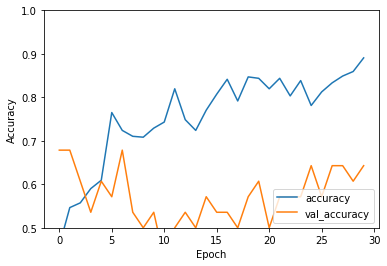

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_set, verbose=2)